[View in Colaboratory](https://colab.research.google.com/github/sharmer156/colab/blob/master/%E6%B5%8B%E8%AF%95%E9%80%9A%E8%BF%87.ipynb)

In [0]:
import unidecode
import string
import random
import re

In [0]:
!pip install unidecode

    100% |████████████████████████████████| 235kB 14.7MB/s 
You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [0]:
all_characters = string.printable
n_characters = len(all_characters)

file = unidecode.unidecode(open('date/flyaway-0.txt').read())
file_len = len(file)
print('file_len =', file_len)

FileNotFoundError: ignored

In [0]:
!dir

datalab


In [0]:
!whereis date

date: /bin/date /usr/share/man/man1/date.1.gz


In [0]:
import unidecode
import string
import random
import re
from urllib.request import urlopen

In [70]:
all_characters = string.printable
n_characters = len(all_characters)

all_characters = string.printable
n_characters = len(all_characters)

file = unidecode.unidecode(urlopen('https://raw.githubusercontent.com/sharmer156/colab/master/1NLP/fieliaoji/date/flyaway-0.txt').read().decode()) #读取网络数据需要添加.decode()，另github需要点入raw文件才是源数据，否则就是包含网页的地址
file_len = len(file)
print('file_len =', file_len)



file_len = 28297


In [52]:
# http://pytorch.org/
from os import path
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())

accelerator = 'cu80' if path.exists('/opt/bin/nvidia-smi') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.3.0.post4-{platform}-linux_x86_64.whl torchvision
import torch

^C
Traceback (most recent call last):
  File "/usr/local/bin/pip3", line 11, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.6/dist-packages/pip/_internal/__init__.py", line 246, in main
    return command.main(cmd_args)
  File "/usr/local/lib/python3.6/dist-packages/pip/_internal/basecommand.py", line 264, in main
    timeout=min(5, options.timeout)) as session:
  File "/usr/local/lib/python3.6/dist-packages/pip/_internal/basecommand.py", line 81, in _build_session
    insecure_hosts=options.trusted_hosts,
  File "/usr/local/lib/python3.6/dist-packages/pip/_internal/download.py", line 338, in __init__
    self.headers["User-Agent"] = user_agent()
  File "/usr/local/lib/python3.6/dist-packages/pip/_internal/download.py", line 127, in user_agent
    setuptools_version = get_installed_version("setuptools")
  File "/usr/local/lib/python3.6/dist-packages/pip/_internal/utils/misc.py", line 829, in get_installed_version
    working_set = pkg_resources.WorkingSet()
  File "/us

In [0]:
import torch
import torch.nn as nn
from torch.autograd import Variable

class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, n_layers=1):
        super(RNN, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.n_layers = n_layers

        self.encoder = nn.Embedding(input_size, hidden_size)
        self.gru = nn.GRU(hidden_size, hidden_size, n_layers)
        self.decoder = nn.Linear(hidden_size, output_size)

    def forward(self, input, hidden):
        input = self.encoder(input.view(1, -1))
        output, hidden = self.gru(input.view(1, 1, -1), hidden)
        output = self.decoder(output.view(1, -1))
        return output, hidden

    def init_hidden(self):
        return Variable(torch.zeros(self.n_layers, 1, self.hidden_size))

In [72]:
# 把string变成LongTensor
def char_tensor(string):
    tensor = torch.zeros(len(string)).long()
    for c in range(len(string)):
        tensor[c] = all_characters.index(string[c])
    return Variable(tensor)

print(char_tensor('abcDEF'))

Variable containing:
 10
 11
 12
 39
 40
 41
[torch.LongTensor of size 6]



In [0]:
def random_training_set():    
    chunk = random_chunk()
    inp = char_tensor(chunk[:-1])
    target = char_tensor(chunk[1:])
    return inp, target

In [0]:
def evaluate(prime_str='A', predict_len=100, temperature=0.8):
    hidden = decoder.init_hidden()
    prime_input = char_tensor(prime_str)
    predicted = prime_str

    # 假设输入的前缀是字符串prime_str，先用它来改变隐状态
    for p in range(len(prime_str) - 1):
        _, hidden = decoder(prime_input[p], hidden)
    inp = prime_input[-1]

    for p in range(predict_len):
        output, hidden = decoder(inp, hidden)

        # 根据输出概率采样
        output_dist = output.data.view(-1).div(temperature).exp()
        top_i = torch.multinomial(output_dist, 1)[0]

        # 用上一个输出作为下一轮的输入
        predicted_char = all_characters[top_i]
        predicted += predicted_char
        inp = char_tensor(predicted_char)

    return predicted

In [0]:
import time, math

def time_since(since):
    s = time.time() - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

In [0]:
def train(inp, target):
    hidden = decoder.init_hidden()
    decoder.zero_grad()
    loss = 0

    for c in range(chunk_len):
        output, hidden = decoder(inp[c], hidden)
        loss += criterion(output, target[c])

    loss.backward()
    decoder_optimizer.step()

    return loss.data[0] / chunk_len

In [77]:
n_epochs = 2000
print_every = 100
plot_every = 10
hidden_size = 100
n_layers = 1
lr = 0.005

decoder = RNN(n_characters, hidden_size, n_characters, n_layers)
decoder_optimizer = torch.optim.Adam(decoder.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss()

start = time.time()
all_losses = []
loss_avg = 0

for epoch in range(1, n_epochs + 1):
    loss = train(*random_training_set())       
    loss_avg += loss

    if epoch % print_every == 0:
        print('[%s (%d %d%%) %.4f]' % (time_since(start), epoch, epoch / n_epochs * 100, loss))
        print(evaluate('Wh', 100), '\n')

    if epoch % plot_every == 0:
        all_losses.append(loss_avg / plot_every)
        loss_avg = 0

 1s (100 5%) 2.1307]
Wh. Tougs ame sings the ming of ore skors s sme arts the the foS the Soe wort thee my ow wong uto to p 

 4s (200 10%) 2.0263]
Whe fare the the comut ite the sris the nar the redins risto the ouin neathe the the da o, is in the b 

 5s (300 15%) 2.0301]
Whess is dess eapds the osen the hen gthe the sees the deyrin the chise lowne the the mes ows the of c 

 7s (400 20%) 1.9634]
Whe in pois is whay. Whe int lalng The saskong bur roft ang ruist but gis in the is pots and  rairt ai 

 9s (500 25%) 2.1029]
Whis is pamp in loven the cast shawhet is own silen cher, suling the this how of peo ford and sis ming 

 11s (600 30%) 1.8675]
Whe mare mord, I am to hein efhow you tromet to am amp fong of to the sam in gre, The I you the surts  

 13s (700 35%) 2.0378]
Whisoullisle an butes dents life fre but weel, de is sing ther, I me foome word apling seallingh event 

 15s (800 40%) 1.7551]
Whe my its is is in furight is is thits mone an it sul me now be thy sillls, and in and

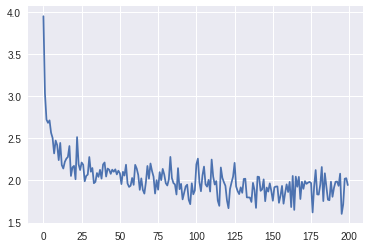

In [79]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

plt.figure()
plt.plot(all_losses)

In [80]:
print(evaluate('The', 200, temperature=0.8))

The seain all morninds pin adest all the set len. Thou upn mister the sot b peart. my he whins for of the eaver be thou be to my My hist. The ment suling ponster all clot mist into the whent kast in the 


In [81]:
print(evaluate('The', 200, temperature=0.2))

The bet the bet my heart be chome the silence and the beart silent in my heart be bet my heart be bet the bet mentan are the clong sun my heart silence and the bet my he bet be bet the bet my he bet my h


In [82]:
print(evaluate('light', 200, temperature=0.5))

light in my he stain be the earth sust and in the bet be becth flodes the brom the my not min mind. Lome by mong peart the beart be the bet daind mirth the mon and of the mong sunser sun my heart be be fil
